In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("bank.csv")

In [3]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [4]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

In [5]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [6]:
Y = all_df['deposit'].values.astype('int64')

In [7]:
X.shape

(11162, 7)

In [8]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [9]:
Y[:5]

array([1, 1, 1, 1, 1])

In [10]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 

In [11]:
train_Features[355:359]

array([[-0.6070719 , -0.2751828 ,  0.04061153,  0.27370403, -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.48418803, -0.54802828, -1.02822609,  1.73144326,  0.18059759,
        -0.48118405, -0.36325984],
       [-0.85890111,  0.13966633, -1.14698582,  2.39981382, -0.55416834,
        -0.48118405, -0.36325984],
       [-0.27129961, -0.12356754, -1.38450529, -0.79511268, -0.18678537,
         0.42913223,  0.0730585 ]])

In [12]:
train_Label[:4]

array([1, 0, 1, 0])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=14*9,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=14*8, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=14*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=14*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=14*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=14*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [21]:
model.add(Dense(units=14*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [22]:
model.add(Dense(units=14*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [23]:
model.add(Dense(units=14, 
                kernel_initializer='uniform', 
                activation='relu'))

In [24]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               1008      
_________________________________________________________________
dense_2 (Dense)              (None, 112)               14224     
_________________________________________________________________
dense_3 (Dense)              (None, 98)                11074     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                8316      
_________________________________________________________________
dense_5 (Dense)              (None, 70)                5950      
_________________________________________________________________
dense_6 (Dense)              (None, 56)                3976      
_________________________________________________________________
dense_7 (Dense)              (None, 42)                2394      
__________

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [27]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 8036 samples, validate on 893 samples
Epoch 1/30
8036/8036 [==============================] - 2s 264us/step - loss: 0.6731 - acc: 0.5368 - val_loss: 0.5584 - val_acc: 0.7290
Epoch 2/30
8036/8036 [==============================] - 3s 322us/step - loss: 0.5001 - acc: 0.7683 - val_loss: 0.4853 - val_acc: 0.7783
Epoch 3/30
8036/8036 [==============================] - 2s 269us/step - loss: 0.4857 - acc: 0.7766 - val_loss: 0.4913 - val_acc: 0.7760
Epoch 4/30
8036/8036 [==============================] - 2s 281us/step - loss: 0.4763 - acc: 0.7829 - val_loss: 0.4832 - val_acc: 0.7816
Epoch 5/30
8036/8036 [==============================] - 4s 512us/step - loss: 0.4736 - acc: 0.7825 - val_loss: 0.4871 - val_acc: 0.7783
Epoch 6/30
8036/8036 [==============================] - 3s 406us/step - loss: 0.4736 - acc: 0.7861 - val_loss: 0.4746 - val_acc: 0.7772
Epoch 7/30
8036/8036 [==============================] - 3s 428us/step - loss: 0.4687 - acc: 0.7885 - val_loss: 0.4706 - val_acc: 0.7839
E

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

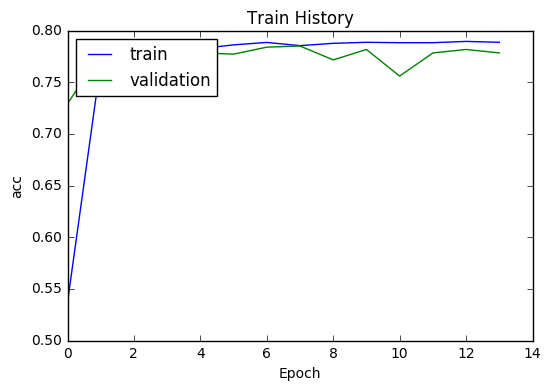

In [29]:
show_train_history(train_history,'acc','val_acc')

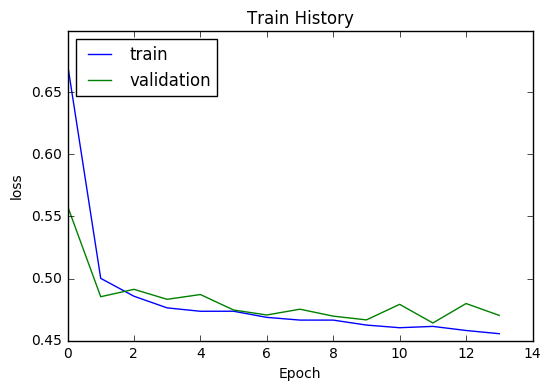

In [30]:
show_train_history(train_history,'loss','val_loss')

In [31]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 93us/step


In [32]:
scores[1]

0.7966860724947562